# Predicting Particulate Matter of 2.5 Microns or Less in Diameter (PM 2.5)
## The Beijing Multi-Site Air-Quality Data 

#### Bei Wang, PhD student in epidemiology at dpt of PHS
03/18/2022

Presentation video link: https://drive.google.com/file/d/1FkOaCVWzPbsL4EFVrqaFz27en6RaLTXC/view?usp=sharing

### Background and importance

PM2.5 is a widespread and inhalable air pollutant that has serious health effects. Data on PM2.5 concentration is important as they advice robust policies for substantial decreases in PM2.5. In developed countries, nearly all urban areas have a few air quality PM2.5 monitors. Larger cities tend to have more. It is estimated that there is averagely one monitor per 100-600k residents in Europe and North America (World Health Organization, 2018). But in less developed regions and countries, there is limited or no measurements of air pollution including PM2.5. In sub-Saharan Africa, the average is one monitor per 15.9 million residents (WHO Global Ambient Air Quality Database, 2016). Therefore, my task is based on the idea that a model developed from on available PM2.5 data may help predict PM2.5 in areas where there is limited to no monitoring. 

### Task

My task if a regression task predicting outdoor PM.2.5 (ug/m^3) using the Beijing Multi-site air quality data. The original dataset has 420768 hourly observations over 5 years (2013-17) across 12 air-quality monitoring sites in Beijing, China.  

(Data link: https://archive.ics.uci.edu/ml/datasets/Beijing+Multi-Site+Air-Quality+Data)



**Attribute information**
- No: row number of observation in each site
- year: year of data in this row
- month: month of data in this row
- day: day of data in this row
- hour: hour of data in this row
- PM2.5: PM2.5 concentration (ug/m^3)
- PM10: PM10 concentration (ug/m^3)
- SO2: SO2 concentration (ug/m^3)
- NO2: NO2 concentration (ug/m^3)
- CO: CO concentration (ug/m^3)
- O3: O3 concentration (ug/m^3)
- TEMP: temperature (degree Celsius)
- PRES: pressure (hPa)
- DEWP: dew point temperature (degree Celsius)
- RAIN: precipitation (mm)
- wd: wind direction
- WSPM: wind speed (m/s)
- station: name of the air-quality monitoring site

### Imports

In [909]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  GridSearchCV,RandomizedSearchCV
import dmba
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.base import clone
from sklearn.svm import LinearSVR
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import time
import warnings
warnings.filterwarnings('ignore')

In [910]:
# read in data in seperate files 
files= [
"PRSA_Data_Aotizhongxin_20130301-20170228.csv", 
"PRSA_Data_Changping_20130301-20170228.csv", 
"PRSA_Data_Dingling_20130301-20170228.csv", 
"PRSA_Data_Dongsi_20130301-20170228.csv",
"PRSA_Data_Guanyuan_20130301-20170228.csv",
"PRSA_Data_Gucheng_20130301-20170228.csv",
"PRSA_Data_Huairou_20130301-20170228.csv",
"PRSA_Data_Nongzhanguan_20130301-20170228.csv",
"PRSA_Data_Shunyi_20130301-20170228.csv",
"PRSA_Data_Tiantan_20130301-20170228.csv",
"PRSA_Data_Wanliu_20130301-20170228.csv",
"PRSA_Data_Wanshouxigong_20130301-20170228.csv"]

# combine all into one full dataframe
dfs= []
for file in files: 
    df= pd.read_csv(file)
    dfs.append(df)
pm= pd.concat(dfs, ignore_index= True)
pm

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


### 1. Data Exploration

The dataframe stores 420768 observation of air quality across 12 sites, each site has data over 5 years with 35064 observation in each year. 

In [911]:
pm.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

In [912]:
pm.nunique()

No         35064
year           5
month         12
day           31
hour          24
PM2.5        888
PM10        1084
SO2          691
NO2         1212
CO           132
O3          1598
TEMP        2034
PRES         726
DEWP         645
RAIN         253
wd            16
WSPM         117
station       12
dtype: int64

In [913]:
pm.shape

(420768, 18)

In [914]:
#missing values 
pm.isnull().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [915]:
pm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [916]:
pm.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


### 2. Data Preprocessing  

- Drop missing in target feature
- Data cleaning: missingness, imputation, and checking duplicates
- Visualize PM2.5 across time
- Feature representation
- Drop columns that are not useful('No', 'station')

#### 2.1 Target (PM2.5) 

Missing in the target feature makes the observation meaningless. There are 8739 missing values in my target feature PM2.5. I will drop these observations. 

In [917]:
pm= pm[pm['PM2.5'].notna()]

In [918]:
pm['PM2.5'].isnull().sum()

0

In [919]:
pm.shape

(412029, 18)

#### 2.2 Imputing missing values 

- Numerical features with missingness: PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, WSPM   
- Categorical features: wd, station  

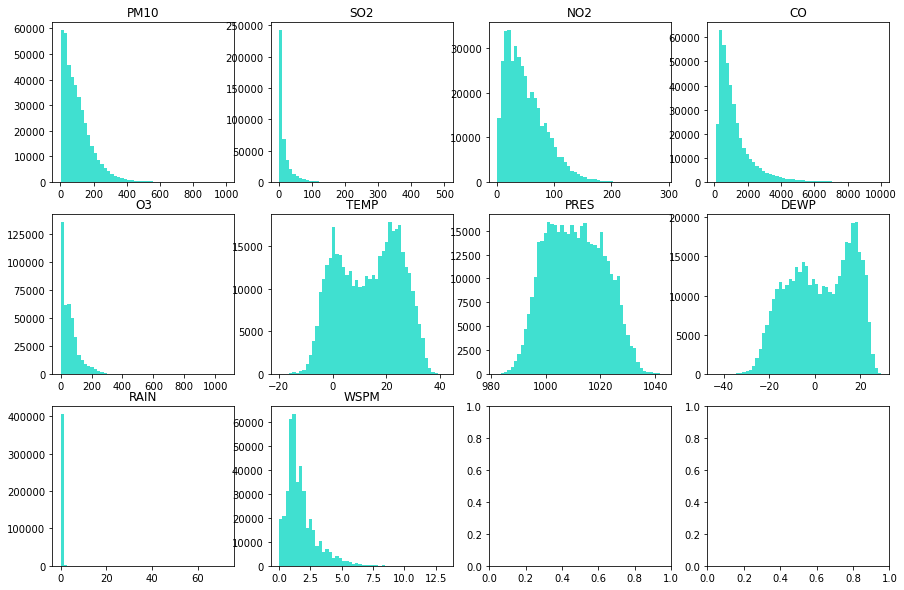

In [920]:
num= ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
num_feature= pm[num]
#plot the distribution of numeric values 
fig, axs= plt.subplots(3,4, figsize=(15,10))
ax= axs.ravel()
for i in range(len(num)): 
    ax[i].hist(num_feature.iloc[:, i], bins=50, color= 'turquoise')
    ax[i].set_title(num[i])

**It is the best to use mean for symmetrical distributions and use median for skewed distribution. Based on my distributions, I will impute TEMP and PRES with means and use medians for the other features.**

Numeric feature imputation

In [921]:
mean_imp= SimpleImputer(strategy="mean")
median_imp= SimpleImputer(strategy="median")
pm[['TEMP', 'PRES']]= mean_imp.fit_transform(pm[['TEMP', 'PRES']])
pm[['PM10', 'SO2', 'NO2', 'CO', 'O3', 'DEWP', 'RAIN', 'WSPM']]= median_imp.fit_transform(pm[[ 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'DEWP', 'RAIN', 'WSPM']]);

"wd" is the only categorical feature that needs imputation, I will impute with the most frequent value. 

In [922]:
pm['wd'].value_counts()

NE     42592
ENE    33539
NW     31881
N      30315
E      29104
SW     28142
NNE    27748
NNW    24786
WNW    23816
ESE    23705
SSW    22063
SE     19634
WSW    19559
S      18925
SSE    17245
W      17178
Name: wd, dtype: int64

In [923]:
freq_imp= SimpleImputer(strategy="most_frequent")
pm[['wd']]= freq_imp.fit_transform(pm[['wd']])

In [924]:
pm.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Check for duplicates: no duplicated rows

In [925]:
# drop "No" as it will not be useful
pm.duplicated().sum()

0

#### 2.3 Shrink data (for limited computer power)

Given the large sample size of the data and my computer power, I was not able to perform many model training techniques. For instance, I performed GridSearchCV and RandomSearchCV with 3-folds cross-validation and a few combinations of parameters; I was not able to run it within a reasonable time. So, **I decide to add this step in data preprocessing to randomly select a subset of the full dataset**, although this might not be the best solution in practice. 

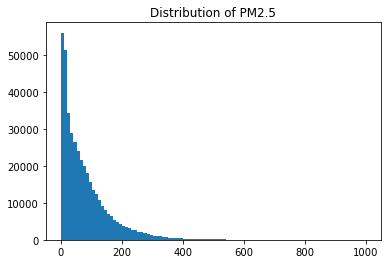

In [926]:
# PM2.5 distribution before subsetting
plt.hist(pm['PM2.5'],100)
plt.title("Distribution of PM2.5");

In [927]:
pm.shape

(412029, 18)

In [928]:
pm= pm.sample(frac=0.05, random_state=42)

Text(0.5, 1.0, 'Distribution of PM2.5 (5% of the original data)')

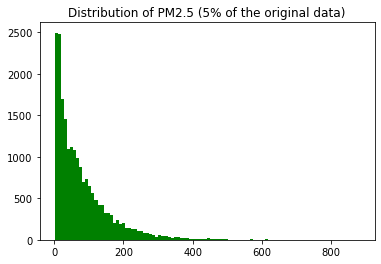

In [929]:
# PM2.5 distribution after subsetting
plt.hist(pm['PM2.5'],100, color='green')
plt.title("Distribution of PM2.5 (5% of the original data)")

In [930]:
#save a copy of orginal prepared dataset for later use
original_df= pm
pm.shape

(20601, 18)

The distributions of the target feature PM2.5 look similar, suggesting random subsetting of the dataset in terms of the target feature. 

#### 2.3 Visualizing PM2.5 across time and location

#### PM 2.5 by 12 monitoring sites

In [931]:
pm['station'].value_counts()

Guanyuan         1809
Dingling         1789
Tiantan          1740
Wanliu           1720
Shunyi           1719
Nongzhanguan     1709
Gucheng          1704
Dongsi           1699
Changping        1696
Wanshouxigong    1679
Aotizhongxin     1669
Huairou          1668
Name: station, dtype: int64

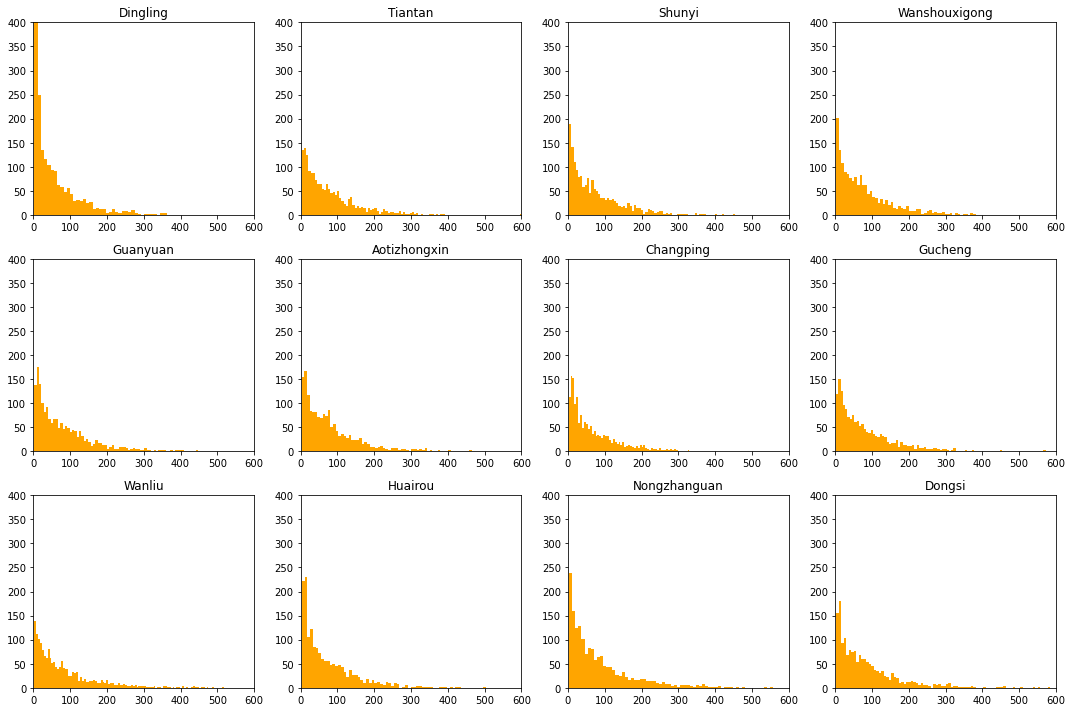

In [932]:
site_names= list(pm['station'].unique())
fig, axs= plt.subplots(3,4, figsize=(15,10))
ax= axs.ravel()
for i in range(len(site_names)):
    ax[i].hist(pm[pm['station']== site_names[i]]['PM2.5'], bins=100, color='orange')
    ax[i].set_title(site_names[i])
    ax[i].set_ylim(0,400)
    ax[i].set_xlim(0,600)
plt.tight_layout()

There are variation across sites. Some sites have longer and bigger tails (e.g., Dongsi), indicating more observations with high PM2.5. But the variation looks minimal from the visulization above. 

#### Yearly means and medians PM 2.5 from 2013-2017

It looks like the year 2017 had a lot fewer observations 

In [933]:
pm['year'].value_counts()

2016    5225
2014    5118
2015    5039
2013    4363
2017     856
Name: year, dtype: int64

Getting yearly means and medians of PM2.5

In [934]:
yearls= list(pm['year'].unique())
pm_mean=[]
pm_median=[]
for i in yearls: 
    pm_mean.append(pm[pm['year']== i]['PM2.5'].mean(axis=0))
    pm_median.append(pm[pm['year']== i]['PM2.5'].median(axis=0))
df= pd.DataFrame({'year':yearls, 'mean':pm_mean, 'median': pm_median})
df=df.sort_values(by='year')
df

,year,mean,median
4,2013,78.524295,58.0
0,2014,84.302501,62.0
1,2015,79.707283,51.0
3,2016,71.200191,47.0
2,2017,90.762850,42.5


Distribution of PM2.5 by year from 2013-2017. The increase in mean of 2017 was driven by a larger proportions of measurements in the higher range and much less total number of observations compared to other years. The median shows that the the level of PM2.5 in 2017 is lower than other years. But this might related to the fact that there were much fewer observations for 2017 in the original data.  

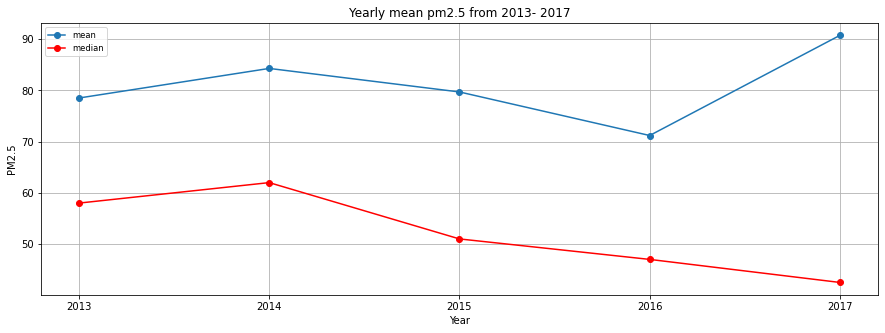

In [935]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(df['year'], df['mean'], marker='o', label= 'mean')
plt.plot(df['year'], df['median'], marker='o', color= 'red', label= 'median')
plt.title("Yearly mean pm2.5 from 2013- 2017")
plt.xticks(df['year'])
plt.grid(True)
ax.set_xlabel('Year')
ax.set_ylabel('PM2.5')
plt.legend(loc="upper left", fontsize="small");

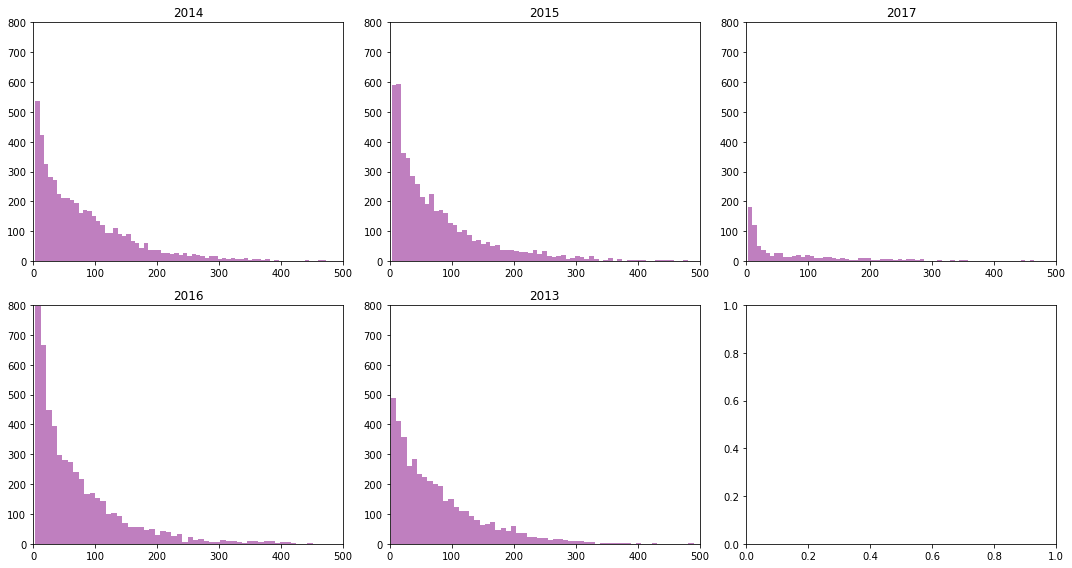

In [936]:
fig, axs= plt.subplots(2,3, figsize=(15,8))
ax= axs.ravel()
for i in range(len(yearls)):
    ax[i].hist(pm[pm['year']== yearls[i]]['PM2.5'], bins=100, color='purple', alpha=.5)
    ax[i].set_title(yearls[i])
    ax[i].set_ylim(0,800)
    ax[i].set_xlim(0,500)
plt.tight_layout()

#### Monthly means and medians of PM2.5 from 2013- 2017

In [937]:
monthls= list(pm['month'].unique())
monthls

[1, 7, 12, 6, 11, 4, 3, 9, 8, 10, 5, 2]

In [938]:
pm_mean=[]
pm_median=[]
for i in monthls: 
    pm_mean.append(pm[pm['month']== i]['PM2.5'].mean(axis=0))
    pm_median.append(pm[pm['month']== i]['PM2.5'].median(axis=0))
df= pd.DataFrame({'month':monthls, 'mean':pm_mean, 'median': pm_median})
df= df.sort_values(by='month')
df

,month,mean,median
0,1,96.147165,66.0
11,2,82.331920,38.0
6,3,93.447412,72.0
5,4,71.953446,59.0
10,5,63.395630,50.0
3,6,68.728487,52.0
1,7,71.156831,59.0
8,8,52.464326,39.0
7,9,60.794100,44.0
9,10,91.587734,58.0


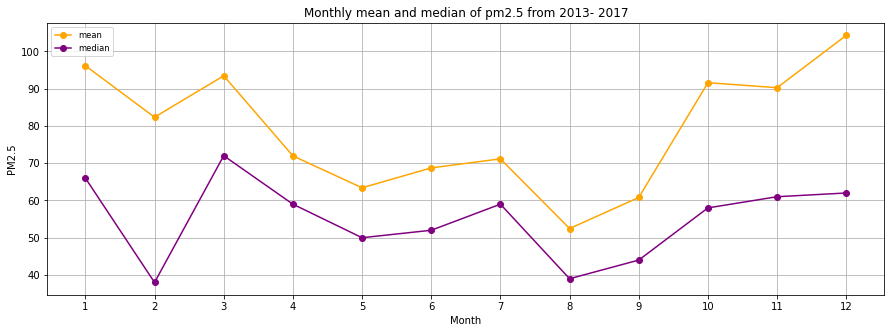

In [939]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(df['month'], df['mean'], marker='o', label= 'mean', color= 'orange')
plt.plot(df['month'], df['median'], marker='o', color= 'purple', label= 'median')
plt.title("Monthly mean and median of pm2.5 from 2013- 2017")
plt.xticks(df['month'])
plt.grid(True)
ax.set_xlabel('Month')
ax.set_ylabel('PM2.5')
plt.legend(loc="upper left", fontsize="small");

It seems the warmer month in Beijing had relatively lower PM2.5

#### Means and Medians of PM 2.5 by day of a month

In [940]:
dayls= list(pm['day'].unique())
pm_mean=[]
pm_median=[]
for i in dayls: 
    pm_mean.append(pm[pm['day']== i]['PM2.5'].mean(axis=0))
    pm_median.append(pm[pm['day']== i]['PM2.5'].median(axis=0))
df= pd.DataFrame({'day':dayls, 'mean':pm_mean, 'median': pm_median})
df= df.sort_values(by='day')

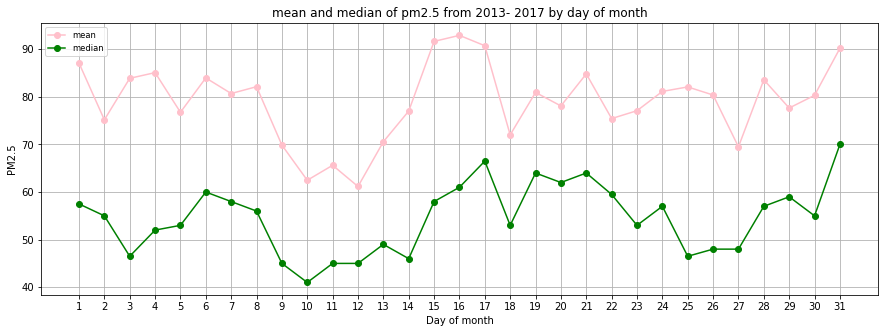

In [941]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(df['day'], df['mean'], marker='o', label= 'mean', color= 'pink')
plt.plot(df['day'], df['median'], marker='o', color= 'green', label= 'median')
plt.title("mean and median of pm2.5 from 2013- 2017 by day of month")
plt.xticks(df['day'])
plt.grid(True)
ax.set_xlabel('Day of month')
ax.set_ylabel('PM2.5')
plt.legend(loc="upper left", fontsize="small");

**Hourly mean variation of PM2.5**

In [942]:
hrls= list(pm['hour'].unique())
pm_mean=[]
pm_median=[]
for i in hrls: 
    pm_mean.append(pm[pm['hour']== i]['PM2.5'].mean(axis=0))
    pm_median.append(pm[pm['hour']== i]['PM2.5'].median(axis=0))
df= pd.DataFrame({'hour':hrls, 'mean':pm_mean, 'median': pm_median})
df= df.sort_values(by='hour')

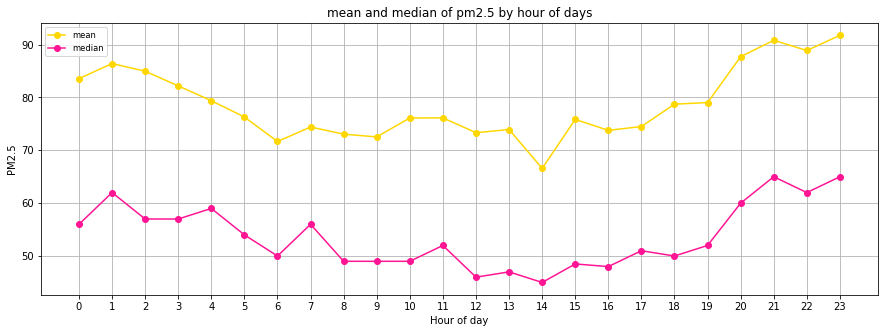

In [943]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(df['hour'], df['mean'], marker='o', label= 'mean', color= 'gold')
plt.plot(df['hour'], df['median'], marker='o', color= 'deeppink', label= 'median')
plt.title("mean and median of pm2.5 by hour of days")
plt.xticks(df['hour'])
plt.grid(True)
ax.set_xlabel('Hour of day')
ax.set_ylabel('PM2.5')
plt.legend(loc="upper left", fontsize="small");

To summarize, PM 2.5 seems to vary by time:  
- The general trend of PM2.5 from 2.13-17 is descreading, but this has to take into consideration of the fact that there were a lot fewer observations in the year 2017. 
- Within a year, PM2.5 level is averagely higher among the winter months (November- March) compared to the rest of the year. 
- Within a month, there are lower average levels of PM 2.5 clustered around the 9th to the 13th days of the month.
- Within a day, PM2.5 is starting from evening to midnight. (8pm to 3am the next day) 

These univariate relationship between time and PM2.5 have important implications for me in terms of how to include these features in my analysis. 

- Month, day, hour: **The lack of linearity** of these features and PM2.5 suggests that it is better to one-hot code them instead of treat them as a numeric value. But one-hot coding all these time features would lead to a large number of features that are not that informative for interpretation and not useful for making prediction. So, I will convert these features into **categoris** such as winter, spring, summer, winter, morning, evening, etc (see more in 2.6 feature representation). 
- Year: Given that the median of PM2.5 decrease over the year somewhat linearily and it is more useful to include year as a **numeric** feature for interpretation and prediction purposes. For example, it makes sense to look at year and say one year increase in time in the future would lead to certain change in PM2.5. This would not be true if treating year as some binary features (e.g., 2017 vs. not 2017).

#### 2.4 Correlation matrix of all features

The correlation matrix shows that TEMP, PRES, and DEWP are highly correlated with each other (which makes sense). This would cause multicollinearity issues if I fit them all in, for example, a linear regression model. So, I may consider to only keep TEMP. 

<AxesSubplot:>

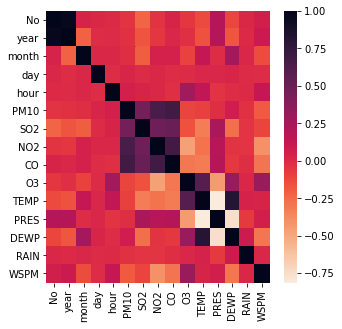

In [944]:
predictors= pm[pm.columns.drop('PM2.5')]
ax=plt.subplots(figsize=(5,5))
corr= predictors.corr()
sns.heatmap(corr, cmap=sns.cm.rocket_r)

In [945]:
def rank_corr_pair (df, n):
    corr= df.corr().abs().unstack()
    corr= corr.sort_values(ascending=False)
    return corr[0: n]

In [946]:
rank_corr_pair(predictors, 22)

No     No       1.000000
year   year     1.000000
RAIN   RAIN     1.000000
DEWP   DEWP     1.000000
PRES   PRES     1.000000
TEMP   TEMP     1.000000
O3     O3       1.000000
CO     CO       1.000000
SO2    SO2      1.000000
PM10   PM10     1.000000
hour   hour     1.000000
day    day      1.000000
month  month    1.000000
NO2    NO2      1.000000
WSPM   WSPM     1.000000
No     year     0.970027
year   No       0.970027
DEWP   TEMP     0.820336
TEMP   DEWP     0.820336
PRES   TEMP     0.813486
TEMP   PRES     0.813486
DEWP   PRES     0.751368
dtype: float64

#### 2.5 Dropping features that aren't useful

Feature 'No' is the number of observation and is not useful here. I also drop the station feature as I would like to increase the generalizability of my final model to other geographical location other than Beijing.

In [947]:
drop=['No', 'station']
pm= pm[pm.columns.drop(drop)]

In [948]:
pm.columns

Index(['year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO',
       'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM'],
      dtype='object')

#### 2.6 Feature representation 

- One-hot encoding for the two categorical features (station, wd)
- Date variables: Based on certain patterns by time we have seen above, I will categorize date variables and apply one-hot coding on them
- Standardization for numeric features. (this is not needed for tree-based methods) 

**Categorizing date variables**

Month: winter: 12-2; spring: 3-5; summer: 6-8; fall: 9-11

In [949]:
def m(x):
    if x in [12,1,2]:
        return 'winter'
    elif x in [3,4,5]:
        return 'spring'
    elif x in [6,7,8]:
        return 'summer'
    else: 
        return 'fall'
pm['month_season']= pm['month'].apply(m)

Day: 1-10; 10-20; 20-30+

In [950]:
def d(x):
    if 1<=x<=10:
        return 'early_mon'
    elif 11<=x<=20:
        return 'mid_mon'
    else:
        return 'late_mon'
pm['day_cat']= pm['day'].apply(d)

Hour: morning: 6-12; afternoon: 12-18; night: 18-24; 1-6:midnight 

In [951]:
def h(x):
    if x in [7,8,9,10,11,12]:
        return 'morning'
    elif x in [13,14,15,16,17,18]:
        return 'afternoon'
    elif x in [19,20,21,22,23,24]:
        return 'night'
    else: 
        return 'midnight'
pm['hour_cat']= pm['hour'].apply(h)

**One-hot encoding**

There are 6 features that should be treated as categrical as listed below. I create ***2 versions*** of dummy variables. For  regression models, I need to drop a category of each categorical feature as a reference category, so that the coefficients correctly represents the associated increase or descrease in PM 2.5 compared to the reference category. Another version of dummy varibles does not drop categories as such, so that I can apply to tree-based methods. 

In [952]:
print('- wd:', pm['wd'].unique())
print('- hour:', pm['hour_cat'].unique())
print('- day:', pm['day_cat'].unique())
print('- month:', pm['month_season'].unique())

- wd: ['SW' 'E' 'NW' 'WNW' 'NE' 'WSW' 'N' 'ESE' 'NNW' 'W' 'SSW' 'NNE' 'ENE' 'S'
 'SSE' 'SE']
- hour: ['afternoon' 'morning' 'midnight' 'night']
- day: ['early_mon' 'late_mon' 'mid_mon']
- month: ['winter' 'summer' 'fall' 'spring']


In [953]:
#drop original date features in full dataset
ori_date= ['hour','day','month']
pm= pm[pm.columns.drop(ori_date)]
#categorical features that need to be one-hot coded 
cat_vars= pm[['wd', 'day_cat', 'month_season','hour_cat']]

version 1: the first level of each variable was dropped

In [954]:
ohe1= OneHotEncoder(drop='first')
ohe1.fit(cat_vars)
cat_ohe1= ohe1.transform(cat_vars).toarray()
cat_ohe1= pd.DataFrame(cat_ohe1, columns= ohe1.get_feature_names(cat_vars.columns), index= pm.index)

version 2: keep all categories 

In [955]:
ohe2= OneHotEncoder()
ohe2.fit(cat_vars)
cat_ohe2= ohe2.transform(cat_vars).toarray()
cat_ohe2= pd.DataFrame(cat_ohe2, columns= ohe2.get_feature_names(cat_vars.columns), index= pm.index)

In [956]:
cat_ohe1.shape, cat_ohe2.shape

((20601, 23), (20601, 27))

In [957]:
#create 2 versions of full data 
pm1= pd.concat([pm, cat_ohe1], axis=1)
pm1 = pm1[pm1.columns.drop(cat_vars)]

pm2= pd.concat([pm, cat_ohe2], axis=1)
pm2 = pm2[pm2.columns.drop(cat_vars)]

In [958]:
pm1.shape, pm2.shape

((20601, 35), (20601, 39))

In [959]:
pm1.columns

Index(['year', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES',
       'DEWP', 'RAIN', 'WSPM', 'wd_ENE', 'wd_ESE', 'wd_N', 'wd_NE', 'wd_NNE',
       'wd_NNW', 'wd_NW', 'wd_S', 'wd_SE', 'wd_SSE', 'wd_SSW', 'wd_SW', 'wd_W',
       'wd_WNW', 'wd_WSW', 'day_cat_late_mon', 'day_cat_mid_mon',
       'month_season_spring', 'month_season_summer', 'month_season_winter',
       'hour_cat_midnight', 'hour_cat_morning', 'hour_cat_night'],
      dtype='object')

### 3. Model training & evaluation 

I apply several methods: **simple linear regression model, Lasso regression, support vector regression, decision tree regression, and randomforest regression**. General models selection steps are: 

- Hyper-parameter tuning: apply GridSearch and a 3-5-folds cross validation in the training set to select the best model

- Evaluate the best model performance in the test set that was set aside
- Error analysis for the final best model

#### 3.1 Linear regression 

Use pm1 with categorical features that dropped the first categories

#### 3.1.1 split and standarization of numeric features

70% and 30% train test split. 
As suggested by the correlation matrix earlier, I will drop highly correlated features (DEWP, TEMP) because they will cause multicollinearity problems in a linear regression. 

In [960]:
drop= ['PM2.5', 'DEWP', 'TEMP']
target=['PM2.5']
X,y= pm1[pm1.columns.drop(drop)], pm1[target]
#split 
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)
#standardize features 
print('Training_X: ', train_X.shape)
print('Validation_X: ', test_X.shape)
print('Training_y: ', train_y.shape)
print('Validation_y: ', test_y.shape)

Training_X:  (14420, 32)
Validation_X:  (6181, 32)
Training_y:  (14420, 1)
Validation_y:  (6181, 1)


Standardization

In [961]:
scaler = StandardScaler()
#train_X 
num_columns= train_X.columns.drop(cat_ohe1.columns)
num_std= pd.DataFrame(scaler.fit_transform(train_X[num_columns]), columns= num_columns, index= train_X.index)
train_X_std= pd.concat([num_std, train_X[cat_ohe1.columns]], axis=1)
#test_X
num_columns= test_X.columns.drop(cat_ohe1.columns)
num_std= pd.DataFrame(scaler.fit_transform(test_X[num_columns]), columns= num_columns, index= test_X.index)
test_X_std= pd.concat([num_std, test_X[cat_ohe1.columns]], axis=1)

#### 3.1.2 A simple linear regression model

I decide to first fit a simple linear regression model to serve as my baseline model performance. I expect model performance would increase as I apply more complex models.

In [962]:
lr= LinearRegression(fit_intercept= False)
lr.fit(train_X_std, train_y)
df= pd.DataFrame({'Predictor': train_X_std.columns, 'coefficient': lr.coef_.ravel()})
df= df.sort_values(by='coefficient',ascending= False, key= pd.Series.abs)
df[0:10]

,Predictor,coefficient
10,wd_ESE,58.483225
18,wd_SSE,55.511752
16,wd_S,54.573824
17,wd_SE,54.572445
1,PM10,54.109397
19,wd_SSW,52.814300
9,wd_ENE,52.502226
13,wd_NNE,52.439284
15,wd_NW,52.229542
23,wd_WSW,52.023974


In [963]:
#Using test set to evaluate performance
y_pred= lr.predict(test_X_std)
print("R^2:", r2_score(test_y, y_pred))
print('MAE: %.3f'% mean_absolute_error(test_y, y_pred))

R^2: 0.790293565946785
MAE: 25.293


The R^2 suggests that 79% of the variance in PM2.5 could be explained by this model. Although 79% is not low, this model used every available feature and a high R^2 is expected. 

**Lasso with GridSearch for the best alpha**

Given the fact that I would like to reduce the # of features for more parsimonious model, I apply Lasso regularization to hopefully reduce some feature coefficients to 0. 

I will use negative mean absolute error instead of R^2 to select the best parameters

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [964]:
params= {'alpha': [0.01, 0.1, 1]}
start = time.time()
search= GridSearchCV(Lasso(random_state=42), params, cv=5, n_jobs=5, scoring= 'neg_mean_absolute_error') 
end = time.time()
results= search.fit(train_X_std, train_y)
print('time:',(end-start)/(1000*60)) # milli-seconds: 0.001 second
print('Best parameters: %s' % results.best_params_)

time: 3.898143768310547e-09
Best parameters: {'alpha': 0.1}


In [965]:
lasso_best= results.best_estimator_
lasso_best.fit(train_X_std, train_y)
print("R^2:", r2_score(test_y, lasso_best.predict(test_X_std)))
print('MAE: %.3f'% mean_absolute_error(test_y, lasso_best.predict(test_X_std)))

R^2: 0.8405937808538835
MAE: 20.662


Both the MAE (20.66 vs. 25.29) and R^2 (0.79 vs. 0.84) improved compared to my baseline simple linear regression

In [966]:
df= pd.DataFrame({'Predictor': train_X_std.columns, 'coefficient': lasso_best.coef_.ravel()})
df= df.sort_values(by='coefficient',ascending= False, key= pd.Series.abs)
df.loc[df['coefficient'] != 0]

,Predictor,coefficient
1,PM10,53.878286
4,CO,20.383368
26,month_season_spring,-8.363435
31,hour_cat_night,-6.140555
8,WSPM,-5.339473
10,wd_ESE,4.308984
21,wd_W,-3.875612
5,O3,3.475800
2,SO2,2.558845
3,NO2,2.095193


As can be seen from the coefficients table, Lasso was able to reduce the model features to only 20. Lasso also results into a model with better performance. However, this model is still quite complex. 

#### 3.1.3 Support vector regression 

Given I have relatively large size of data, I will use LinearSVR. 

In [967]:
X,y= pm2[pm2.columns.drop(drop)], pm2[target]
#split 
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)
#standardize features 
print('Training_X: ', train_X.shape)
print('Validation_X: ', test_X.shape)
print('Training_y: ', train_y.shape)
print('Validation_y: ', test_y.shape)

Training_X:  (14420, 36)
Validation_X:  (6181, 36)
Training_y:  (14420, 1)
Validation_y:  (6181, 1)


Standardization

In [968]:
#train_X 
num_columns= train_X.columns.drop(cat_ohe2.columns)
num_std= pd.DataFrame(scaler.fit_transform(train_X[num_columns]), columns= num_columns, index= train_X.index)
train_X_std= pd.concat([num_std, train_X[cat_ohe2.columns]], axis=1)
#test_X
num_columns= test_X.columns.drop(cat_ohe2.columns)
num_std= pd.DataFrame(scaler.fit_transform(test_X[num_columns]), columns= num_columns, index= test_X.index)
test_X_std= pd.concat([num_std, test_X[cat_ohe2.columns]], axis=1)

In [969]:
params= {'C': [0.1, 1, 10]}
start = time.time()
search= GridSearchCV(LinearSVR(random_state=42), params, cv=5, n_jobs=5, scoring= 'neg_mean_absolute_error') 
end = time.time()
search.fit(train_X_std, train_y)
print('time:',(end-start)/(1000*60)) # milli-seconds: 0.001 second
print('Best parameters: %s' % search.best_params_)
svm_best= search.best_estimator_
svm_best.fit(train_X_std, train_y)
print("R^2:", r2_score(test_y, svm_best.predict(test_X_std)))
print('MAE: %.3f'% mean_absolute_error(test_y, svm_best.predict(test_X_std)))

time: 1.5497207641601562e-09
Best parameters: {'C': 1}
R^2: 0.8345358820760607
MAE: 20.178


In [970]:
df= pd.DataFrame({'Predictor': train_X_std.columns, 'coefficient': svm_best.coef_.ravel()})
df= df.sort_values(by='coefficient',ascending= False, key= pd.Series.abs)
df.loc[df['coefficient'] != 0]

,Predictor,coefficient
1,PM10,62.804338
4,CO,18.658325
25,day_cat_early_mon,14.676367
30,month_season_summer,14.473423
27,day_cat_mid_mon,14.367820
26,day_cat_late_mon,13.593084
32,hour_cat_afternoon,12.984712
33,hour_cat_midnight,12.241538
28,month_season_fall,11.307411
31,month_season_winter,10.470638


The results look worse compared to Lasso. Although they have similar R^2 and MAE, the Lasso was able to reduce the number of features significantly, whereas svm did not. 

#### 3.1.4 Decision tree regressor

No need to standardize features

In [971]:
params= {
    'criterion': ['absolute_error'],
    'max_depth': [3,4,5]
        }
start = time.time()
search= GridSearchCV(DecisionTreeRegressor(random_state=42), params, cv=3, n_jobs=5, scoring= 'neg_mean_absolute_error') 
search.fit(train_X, train_y)
end = time.time()

print('MAE: %.3f' % search.best_score_)
print('Best parameters: %s' % search.best_params_)
print('time:',(end-start)/(1000*60)) # milli-seconds: 0.001 second

MAE: -18.684
Best parameters: {'criterion': 'absolute_error', 'max_depth': 5}
time: 0.0003205331007639567


In [972]:
dt_best= search.best_estimator_
dt_best.fit(train_X, train_y)
print("R^2:", r2_score(test_y, dt_best.predict(test_X)))
print('MAE: %.3f'% mean_absolute_error(test_y, dt_best.predict(test_X)))

R^2: 0.8324004158489225
MAE: 19.439


In [973]:
df= pd.DataFrame({'Predictor': train_X_std.columns, 'coefficient': dt_best.feature_importances_})
df= df.sort_values(by='coefficient',ascending= False, key= pd.Series.abs)
df.loc[df['coefficient'] != 0]

,Predictor,coefficient
1,PM10,0.885934
4,CO,0.093068
3,NO2,0.017366
2,SO2,0.002091
5,O3,0.001075
8,WSPM,0.000466


I would like to keep the tree simpler by limiting the "max_depth" in my grid search to 3-5. If I increase this number range, the R^2 would likely to go up, sacrificing the simplicity of my model. However, even with a maximum depth of the tree being 5, the model performance is slightly better judging by MAE compared to SVM, Lasso regression, and simple linear regression. More importantly, the model built by decision tree regression results in a model with only 7 predictive features for PM2.5. This is a greater reduction of features compared to Lasso. **So far, the decision tree regressor seems to produce the best model**. 

#### 3.1.5 Random forest decision tree regressor

Take one step further of the decistion tree regression using a ensemble method

In [974]:
params= {
    'n_estimators': [10],
    'criterion': ['absolute_error'],
    'max_depth': [3,4,5]
        }
start = time.time()
search= GridSearchCV(RandomForestRegressor(random_state=42), params, cv=3, n_jobs=5, scoring= 'neg_mean_absolute_error') 
search.fit(train_X, train_y)
end = time.time()

print('MAE: %.3f' % search.best_score_)
print('Best parameters: %s' % search.best_params_)
print('time:',(end-start)/(1000*60)) # milli-seconds: 0.001 second

MAE: -17.795
Best parameters: {'criterion': 'absolute_error', 'max_depth': 5, 'n_estimators': 10}
time: 0.0013783298373222352


In [975]:
rf_best= search.best_estimator_
rf_best.fit(train_X, train_y)
print("R^2:", r2_score(test_y, rf_best.predict(test_X)))
print('MAE: %.3f'% mean_absolute_error(test_y, rf_best.predict(test_X)))

R^2: 0.8509713301624034
MAE: 18.570


In [977]:
df= pd.DataFrame({'Predictor': train_X_std.columns, 'coefficient': rf_best.feature_importances_})
df= df.sort_values(by='coefficient',ascending= False, key= pd.Series.abs)
df.loc[df['coefficient'] != 0]

,Predictor,coefficient
1,PM10,0.885317
4,CO,0.101542
3,NO2,0.007749
2,SO2,0.002313
6,PRES,0.001042
5,O3,0.000981
8,WSPM,0.000802
0,year,0.000162
29,month_season_spring,0.000092


This model has the highest R^2 so far and lowest MAE with only 9 features. This is my **best-performed model**.

### 4. Interpretation and error analysis

The final model created by random forest regression is below. It looks like many of the air pollution measures other than PM2.5 are predictive of PM2.5, which could be useful to make prediction when these information are available. Spring season, year, and wind speed were also positively associated with increase level of PM2.5.

In [983]:
df= df.loc[df['coefficient'] != 0]
df['label']= ['PM10 concentration (ug/m^3)', 'CO concentration (ug/m^3)', 'NO2 concentration (ug/m^3)', 
             'SO2 concentration (ug/m^3)', 'Pressure (hPa)', 'O3 concentration (ug/m^3)', 'Wind speed (m/s)',
             'Year increase by 1', 'Spring season']
df

,Predictor,coefficient,label
1,PM10,0.885317,PM10 concentration (ug/m^3)
4,CO,0.101542,CO concentration (ug/m^3)
3,NO2,0.007749,NO2 concentration (ug/m^3)
2,SO2,0.002313,SO2 concentration (ug/m^3)
6,PRES,0.001042,Pressure (hPa)
5,O3,0.000981,O3 concentration (ug/m^3)
8,WSPM,0.000802,Wind speed (m/s)
0,year,0.000162,Year increase by 1
29,month_season_spring,0.000092,Spring season


**Residual plot in the test set**

It looks like residuals are normally distributed. 

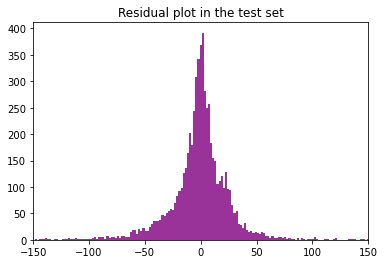

In [901]:
#plot residuals in test set 
y_pred= rf_best.predict(test_X)
res= test_y.values.flatten()-y_pred
plt.hist(res, bins=500, color='purple', alpha=0.8)
plt.xlim(-150,150)
plt.title("Residual plot in the test set");

**Residual plots by all features**

Residual plots are helpful to see where the model made wrong predictions. A good model would have residuals randomly scattered around the y=0 line and there is a homoscedasticity along with the y=0 line. It is informative to plot residuals against each features. 

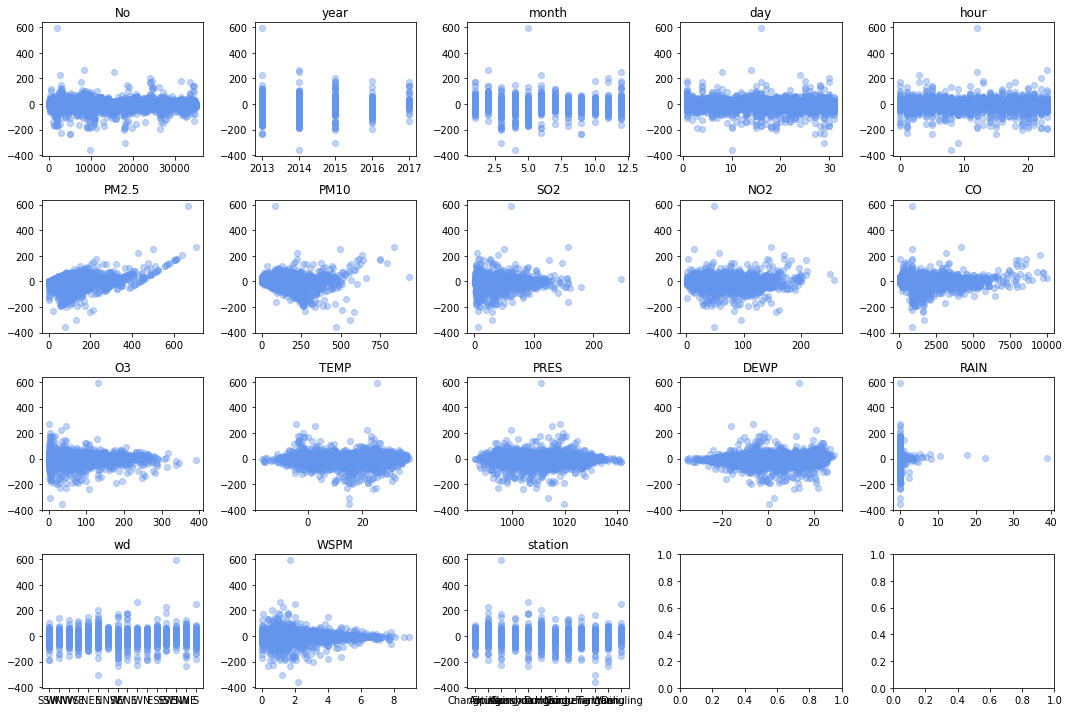

In [987]:
#prepare the data
train, test = train_test_split(original_df, test_size=0.3, random_state=42)
#plot the distribution of numeric values 
fig, axs= plt.subplots(4,5, figsize=(15,10))
ax= axs.ravel()
for i in range(len(test.columns)): 
    ax[i].scatter(test.iloc[:, i],res, alpha=0.4, color= 'cornflowerblue')
    ax[i].set_title(test.columns[i])
plt.tight_layout()
plt.show()

First, residuals are not randomly scattered against PM2.5, suggesting that there might be other predictors I didn't include in my model. It also looks like large residuals occured at observations where rain precipitation were low and wind speed was low. 